## Practice Problem on "Indexing And SQLite"

#### Problem 1 : Update SQL Table

A given data of 12 Employees working in an investment firm. So add the Employee Data in Employee SQLite Database of Employee_Detail Table which was created by you.

In [4]:
import sqlite3

db = sqlite3.connect('Employee_Detail.sqlite')
db

In [5]:
cur = db.cursor()
cur

In [8]:
sql_query = 'create table Employee_Detail(Employee_ID int primary key, Name text, Age int, Department text, Salary int )'
cur.execute(sql_query)

In [11]:
values = [(101, 'Aadarsh', 25, 'Marketing', 50000),(102, 'Aarti', 27, 'Operations', 60000),(103, 'Siddharth', 25, 'Finance', 85000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()

In [12]:
values = [(104, 'Aman', 24, 'Human Resource', 75000),(105, 'Amit', 30, 'Marketing', 50000),(106, 'Shivansh', 26, 'IT', 90000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()

In [13]:
values = [(107, 'Vaibhav', 23, 'Finance', 85000),(108, 'Himanshu', 26, 'IT', 90000),(109, 'Raman', 25, 'Operations', 60000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()

In [14]:
values = [(110, 'Kunal', 26, 'Marketing', 50000),(111, 'Adhira', 29, 'Human Resource', 75000),(112, 'Tanya', 24, 'Marketing', 50000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()

In [16]:
db.close()
print('Done')

Done


#### Problem 2 : Finance Employee SQLite
Find the employee_id of employee whose is working in Finance Department in Investment firm from Employee SQLite Database.  
Print the employee_id as integer value

In [17]:
import sqlite3

db = sqlite3.connect('Employee_Detail.sqlite')
cur = db.cursor()

In [20]:
cur.execute('select * from Employee_Detail where Department = "Finance"')
ans = cur.fetchall()
for i in ans:
    print(i[0])
db.close()

103
107


#### Problem 3 : Find Employee
Find the number of employee working in different department in an investment firm from Employee SQLite Database.  
Print the department and number of employee

In [21]:
import sqlite3

db = sqlite3.connect('Employee_Detail.sqlite')
cur = db.cursor()


In [25]:
cur.execute('select Department,count(*) from Employee_Detail group by Department')
ans = cur.fetchall()
for i in ans:
    print(i[0],i[1])
db.close()

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


#### Problem 4 : Count Genre
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the count of each genre present in IMDB movie dataset?  
Print the Genre and number of movies present in that genre.   
Note: Ignore the empty value present in genre

In [1]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [29]:
data = pd.read_sql_query('select * from genre', db)
data = data[data['genre']!='']
#print(data.to_string(index=False, header=False))
data = data["genre"].value_counts()
for i in range(len(data)):
    print(data.index[i],data.values[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Romance 13
Animation 13
Crime 11
Mystery 7
Fantasy 7
History 6
Sport 3
Family 3
Music 3
Horror 2
War 2
Western 2
Musical 1


#### Problem 5 : IMDB Movie
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.  
Print the rating of that movie.


In [30]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [63]:
data = pd.read_sql_query('select * from earning inner join IMDB on earning.Movie_id=IMDB.Movie_id',db)
#select * from earning join IMDB using(Movie_id) 
data["Total"] = data["Domestic"] + data["Worldwide"]
max1 = max(data["Total"])
data=data[data['Total']==max1]
print(data.values[0][5])

8.1


## Assignment

### Problem 1 : IMDB Voted
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the most voted movie in IMDB Movie Database.  
Print the movie name and the rating of that movie.  

In [1]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [15]:
data = pd.read_sql_query('select * from IMDB',db)
max1 = max(data['TotalVotes'])
data = data[data['TotalVotes']==max1]
print(data['Title'].values[0],data['Rating'].values[0])

Inception (2010) 8.8


### Problem 2 : IMDB running time
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the Movie with Longest-Running Time from IMDB Movie database.  
Print the name of movie and running time as integer value.

In [21]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [25]:
data = pd.read_sql_query('select * from IMDB',db)

def fun(input_runtime):
    return input_runtime.strip().split(" ")[0]

data['Runtime'] = data['Runtime'].apply(fun)
data['Runtime'].replace('',np.nan,inplace=True)
data['Runtime'].astype(float) 

data.dropna(inplace=True,subset=['Runtime'])
data['Runtime']=data['Runtime'].astype(int)
max1 = max(data['Runtime'])
data=data[data['Runtime']== max1]

print(data['Title'].values[0],data['Runtime'].values[0])



The Wolf of Wall Street (2013) 180


### Problem 3 : IMDB profit
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the movie which has maximum net profit in IMDB Movie Database.  
Print the movie name.  
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget


In [6]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [7]:
data = pd.read_sql_query('select * from earning  join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']
data['Budget'].replace('',np.nan,inplace=True)
data['Budget'].astype(float)
data['Profit']=data['Total']-data['Budget']

max1 = max(data['Profit'])
data=data[data['Profit']==max1]
print(data.values[0][3])

Star Wars: The Force Awakens (2015)


### Problem 4 : IMDB least budget
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the least budgeted movie in IMDB Movie Database.  
If there is more than one least budgeted movies then print the movie which has maximum net profit.  
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [4]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')


In [5]:
data = pd.read_sql_query('select * from earning join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']
data['Budget'].replace('',np.nan,inplace=True)
data['Budget'].astype(float)
data['Profit']=data['Total']-data['Budget']

min1 = min(data['Budget'])
data=data[(data['Budget']==min1)]
data=data[data['Profit']==max(data['Profit'])]
print(data['Title'].values[0])

Short Term 12 (2013)


### Problem 5 : IMDB Year Top
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.  
Print the Year and name of the movie which was the highest grosser in that year.  
Note:Print the year in ascending order  

In [2]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

In [12]:
data = pd.read_sql_query('select * from earning join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']

def year(title):
    return int(title.strip().split(" ")[-1][-5:-1])

data['Year'] = data["Title"].apply(year)
data['Year'].unique()

m = data.groupby('Year')['Total'].max()

d = {}
for i in range(len(data['Total'])):
    if data['Total'][i] in (m.values):
        key = data['Year'][i]
        value = data['Title'][i]
        d[key] = value
        
for i  in sorted(d):
    print(i,d[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


### Problem 6 : IMDB genre budget
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.  
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..  
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

In [13]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

db = sqlite3.connect('IMDB.sqlite')

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


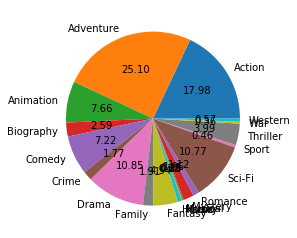

In [17]:
data = pd.read_sql_query('Select * from IMDB join genre using(Movie_id)',db)

data['Budget'].replace("",0,inplace=True)
data.Budget.unique()

data["genre"].replace('',np.NaN,inplace=True)
data.dropna(subset = ["genre"],inplace=True)
grouped_sum = data.groupby("genre")["Budget"].sum()

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()

### Problem 7 : IMDB genre earning
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.  
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.  
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

In [18]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

db = sqlite3.connect('IMDB.sqlite')

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


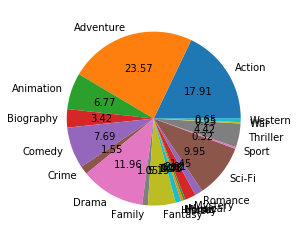

In [22]:
data = pd.read_sql_query('Select * from genre join earning using(Movie_id)',db)

data['Total'] = data["Domestic"] + data["Worldwide"]
data['Total'].unique()
data["genre"].replace("",np.NaN,inplace=True)
data.dropna(subset=["genre"],inplace=True)

grouped_sum=data.groupby("genre")['Total'].sum()

percent = np.true_divide(grouped_sum,grouped_sum.sum())*100
for i in range(len(grouped_sum)):
    print(grouped_sum.index[i],format(percent[i],".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()

### Problem 8 : IMDB Specific Genre
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.  
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.  
Print the movie name.  
Movies has multiple genre.  


In [3]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

data = pd.read_sql_query('Select * from IMDB join genre using(Movie_id)',db)
data = data[((data["genre"]=='Sci-Fi') & (data["Rating"]>=8)) | ((data["genre"]=='Mystery') & (data["Rating"]>=8))]
print(data['Title'].values[0] )

Arrival (2016)
